# Phase_3_Team4.10_draft
## We try to find relationships for Ranking with each of Total Number of Review, Price and Release Year and use a multiple regression model try to predict Ranking with Total Number of Review, Price and Release Year.

- T4.10
- Julien Motaharian, Miles Gallagher, Fenghao Cui, Kaijia Chang
- Section 4

In [1]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# get the original data we should use
data = pd.read_csv('Combined_data.csv')
data

,Name,Price,Review_Summary,Number_of_Reviews,Release_Date,Developers,Genres,Supported_VR,Steam_ID,Average_Review,Operating_Systems,Release_Year
0,War Thunder,0.00,Mostly Positive,560589,"Aug 15, 2013",Gaijin Entertainment,"Action, Massively Multiplayer, Simulation, Fre...",True,236390,Mostly Positive,"Windows, macOS, Linux",2013.0
1,Phasmophobia,19.99,Overwhelmingly Positive,587803,"Sep 18, 2020",Kinetic Games,"Action, Indie, Early Access",True,739630,Overwhelmingly Positive,Windows,2020.0
2,Half-Life: Alyx,20.39,Overwhelmingly Positive,80960,"Mar 23, 2020",Valve,"Action, Adventure",True,546560,Overwhelmingly Positive,Windows,2020.0
3,VRChat,0.00,Mostly Positive,228131,"Feb 1, 2017",VRChat Inc.,"Adventure, Casual, Massively Multiplayer, Simu...",True,438100,Mostly Positive,Windows,2017.0
4,Subnautica,29.99,Overwhelmingly Positive,261656,23 janv. 2018,Unknown Worlds Entertainment,"Aventure, Indépendant",True,264710,Overwhelmingly Positive,"Windows, macOS",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
95,X-Plane 11,29.99,Very Positive,17190,"Mar 30, 2017",Laminar Research,Simulation,True,269950,Very Positive,"Windows, macOS, Linux",2017.0
96,Hellsweeper VR,17.99,Very Positive,347,"Sep 21, 2023",Mixed Realms Pte Ltd,"Action, Indie, RPG, Simulation",True,1341490,Very Positive,Windows,2023.0
97,Aerofly FS 4 Flight Simulator,59.99,Very Positive,667,"Jul 4, 2022",IPACS,"Action, Indie, Racing, Simulation",True,1995890,Very Positive,"Windows, macOS, Linux",2022.0
98,Maestro,24.99,Very Positive,96,"Oct 22, 2024",Double Jack,"Casual, Indie, Simulation",True,2701700,Very Positive,Windows,2024.0


In [3]:
# because of there is no ranking column in data, we add a new column about rank on the DataFrame data.
data['Ranking'] = data.index + 1
data

,Name,Price,Review_Summary,Number_of_Reviews,Release_Date,Developers,Genres,Supported_VR,Steam_ID,Average_Review,Operating_Systems,Release_Year,Ranking
0,War Thunder,0.00,Mostly Positive,560589,"Aug 15, 2013",Gaijin Entertainment,"Action, Massively Multiplayer, Simulation, Fre...",True,236390,Mostly Positive,"Windows, macOS, Linux",2013.0,1
1,Phasmophobia,19.99,Overwhelmingly Positive,587803,"Sep 18, 2020",Kinetic Games,"Action, Indie, Early Access",True,739630,Overwhelmingly Positive,Windows,2020.0,2
2,Half-Life: Alyx,20.39,Overwhelmingly Positive,80960,"Mar 23, 2020",Valve,"Action, Adventure",True,546560,Overwhelmingly Positive,Windows,2020.0,3
3,VRChat,0.00,Mostly Positive,228131,"Feb 1, 2017",VRChat Inc.,"Adventure, Casual, Massively Multiplayer, Simu...",True,438100,Mostly Positive,Windows,2017.0,4
4,Subnautica,29.99,Overwhelmingly Positive,261656,23 janv. 2018,Unknown Worlds Entertainment,"Aventure, Indépendant",True,264710,Overwhelmingly Positive,"Windows, macOS",NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,X-Plane 11,29.99,Very Positive,17190,"Mar 30, 2017",Laminar Research,Simulation,True,269950,Very Positive,"Windows, macOS, Linux",2017.0,96
96,Hellsweeper VR,17.99,Very Positive,347,"Sep 21, 2023",Mixed Realms Pte Ltd,"Action, Indie, RPG, Simulation",True,1341490,Very Positive,Windows,2023.0,97
97,Aerofly FS 4 Flight Simulator,59.99,Very Positive,667,"Jul 4, 2022",IPACS,"Action, Indie, Racing, Simulation",True,1995890,Very Positive,"Windows, macOS, Linux",2022.0,98
98,Maestro,24.99,Very Positive,96,"Oct 22, 2024",Double Jack,"Casual, Indie, Simulation",True,2701700,Very Positive,Windows,2024.0,99


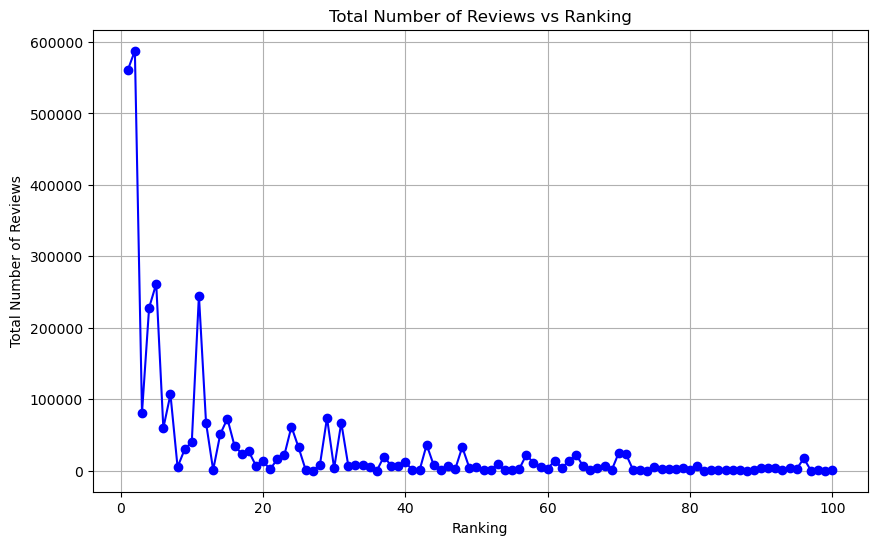

In [4]:
# convert the Number_of_Reviews column to float data
data['Number_of_Reviews'] = data['Number_of_Reviews'].astype(float)
# To revent data missing resulting in running errors.
data = data.dropna(subset=['Ranking', 'Number_of_Reviews'])

# group by Ranking and calculate the sum of Number_of_Reviews
rank_review_sum = data.groupby('Ranking').sum(numeric_only=True)['Number_of_Reviews']

# plotting a linear graph: Ranking vs Total Number of Reviews
plt.figure(figsize=(10, 6))
plt.plot(rank_review_sum.index, rank_review_sum.values, marker='o', linestyle='-', color='b')
plt.title('Total Number of Reviews vs Ranking')
plt.xlabel('Ranking')
plt.ylabel('Total Number of Reviews')
plt.grid(True)
plt.show()


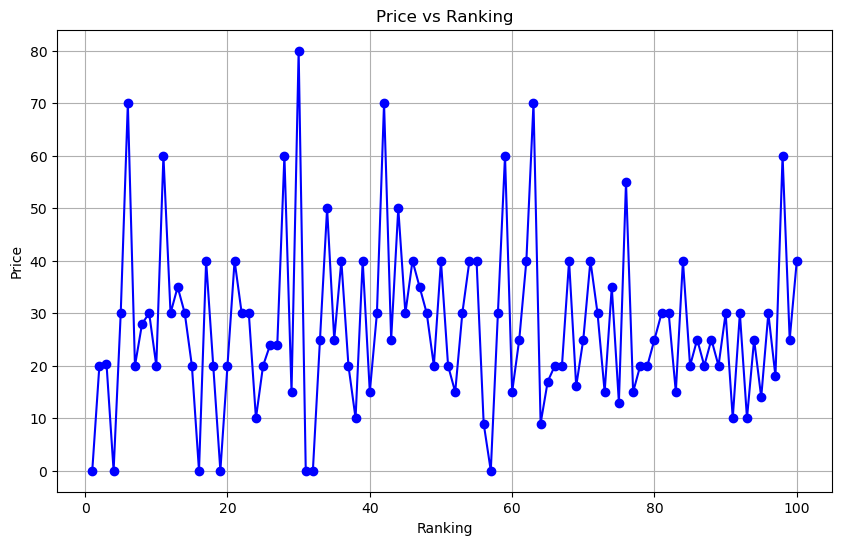

In [5]:
# convert the Price column to float data
data['Price'] = data['Price'].astype(float)
# To prevent data missing resulting in running errors.
data_2= data.dropna(subset=['Ranking', 'Price'])

# group by Ranking and calculate the sum of Price
rank_price_sum = data.groupby('Ranking').sum(numeric_only=True)['Price']

# plotting a linear graph: Ranking vs. Price
plt.figure(figsize=(10, 6))
plt.plot(rank_price_sum.index, rank_price_sum.values, marker='o', linestyle='-', color='b')
plt.title('Price vs Ranking')
plt.xlabel('Ranking')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [6]:
# remove the year from the Release_Date column and make it a new column
data['Year'] = data['Release_Date'].astype(str).apply(lambda x: re.search(r"\d{4}$", x).group())
data= data.dropna(subset=['Ranking', 'Year'])

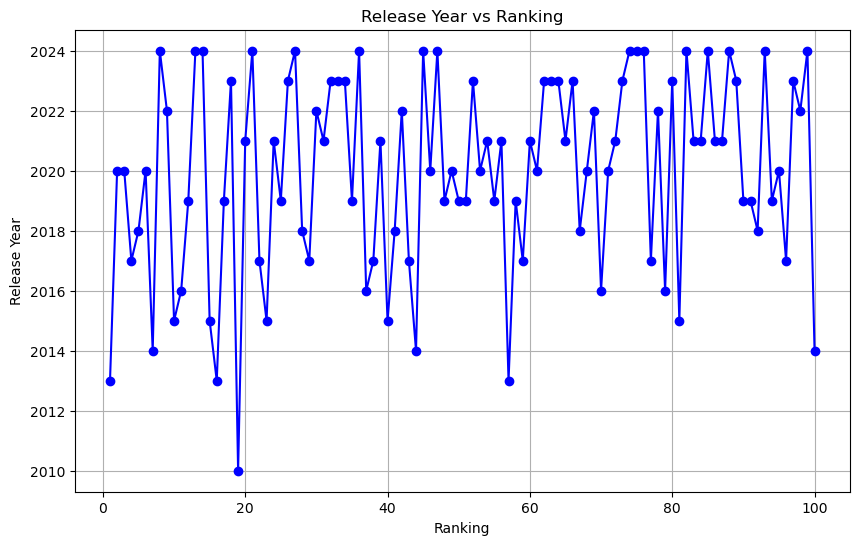

In [7]:
# convert the Year column to float data
data['Year'] = data['Year'].astype(float)
# group by Ranking and find the corresponding year
rank_year_mean = data.groupby('Ranking').sum(numeric_only=True)['Year']

# plotting a linear graph: Ranking vs. release year
plt.figure(figsize=(10, 6))
plt.plot(rank_year_mean.index, rank_year_mean.values, marker='o', linestyle='-', color='b')
plt.title('Release Year vs Ranking')
plt.xlabel('Ranking')
plt.ylabel('Release Year')
plt.grid(True)
plt.show()

## Prediction by Multiple Regression (ML Part)

In [8]:
ml_learning_data = data
ml_learning_data.dropna(inplace=True)
ml_learning_data.head()

,Name,Price,Review_Summary,Number_of_Reviews,Release_Date,Developers,Genres,Supported_VR,Steam_ID,Average_Review,Operating_Systems,Release_Year,Ranking,Year
0,War Thunder,0.00,Mostly Positive,560589.0,"Aug 15, 2013",Gaijin Entertainment,"Action, Massively Multiplayer, Simulation, Fre...",True,236390,Mostly Positive,"Windows, macOS, Linux",2013.0,1,2013.0
1,Phasmophobia,19.99,Overwhelmingly Positive,587803.0,"Sep 18, 2020",Kinetic Games,"Action, Indie, Early Access",True,739630,Overwhelmingly Positive,Windows,2020.0,2,2020.0
2,Half-Life: Alyx,20.39,Overwhelmingly Positive,80960.0,"Mar 23, 2020",Valve,"Action, Adventure",True,546560,Overwhelmingly Positive,Windows,2020.0,3,2020.0
3,VRChat,0.00,Mostly Positive,228131.0,"Feb 1, 2017",VRChat Inc.,"Adventure, Casual, Massively Multiplayer, Simu...",True,438100,Mostly Positive,Windows,2017.0,4,2017.0
5,Microsoft Flight Simulator 40th Anniversary Ed...,69.99,Mostly Positive,59754.0,"17 Aug, 2020",Asobo Studio,Simulation,True,1250410,Mostly Positive,Windows,2020.0,6,2020.0


In [9]:
# define the feature list
x_feat_list = ['Price', 'Number_of_Reviews', 'Year']

# feature matrix
X_list_value= ml_learning_data[x_feat_list].values  

# target array
y = ml_learning_data['Ranking'].values 

# calculate mean of feature list
X_mean = X_list_value.mean(axis=0)

# calculate standard deviation of feature list
X_std = X_list_value.std(axis=0)

# calculate standardization
X = (X_list_value - X_mean) / X_std


In [10]:
def line_of_best_fit (X, y):
    '''
    Calculate the coefficients for the line of best fit, including an intercept term.
    
    Args:
        X (array): Predictor values, either 1-d or 2-d which includes all the predictor values, not including bias term.
        y (array): a 1-d array which includes all corresponding response values to X.

    Returns:
        array: Vector containing the coefficients for the line of best fit, including an intercept term.
    
    '''
    
    XtXinv = np.linalg.inv(np.matmul(add_bias_column(X).T, add_bias_column(X)))
    coefficients = np.matmul(XtXinv, np.matmul(add_bias_column(X).T, y))
    
    return coefficients

In [11]:
def add_bias_column(X):
    """
    Args:
        X (array): can be either 1-d or 2-d
    
    Returns:
        Xnew (array): the same array, but 2-d with a column of 1's in the first spot
    """
    
    # If the array is 1-d
    if len(X.shape) == 1:
        Xnew = np.column_stack([np.ones(X.shape[0]), X])
    
    # If the array is 2-d
    elif len(X.shape) == 2:
        bias_col = np.ones((X.shape[0], 1))
        Xnew = np.hstack([bias_col, X])
        
    else:
        raise ValueError("Input array must be either 1-d or 2-d")

    return Xnew

In [12]:
def linreg_predict(Xnew, ynew, m):
    """
    Calculate predictions, residuals, MSE, and R^2 for linear regression.

    Args:
        Xnew (array): Predictor values, either 1-d or 2-d which includes all the p predictor features, not including bias term.
        ynew (array): a 1-d array which includes all corresponding response values to Xnew.
        m (array): a 1-d array of length p+1 which contains the coefficients from the line_of_best_fit function, including intercept.

    Returns:
        dict: Dictionary containing 'ypreds', 'resids', 'mse', and 'r2'.
    """
    # add bias column to Xnew
    Xnew_with_bias = add_bias_column(Xnew)
    
    # calculate predicted values
    ypreds = np.matmul(Xnew_with_bias, m)
    
    # calculate residuals
    resids = ynew - ypreds
    
    # calculate mean squared error
    mse = (resids ** 2).mean()
    
    # calculate R^2 score
    r2 = r2_score(ynew, ypreds)
    
    return {
        'ypreds': ypreds,
        'resids': resids,
        'mse': mse,
        'r2': r2
    }


In [13]:
# using single-fold cross validation with a 70-30 split, create Xtrain, Xtest, ytrain, and ytest.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# using line_of_best_fit function to find the relatively coefficient
coefficient = line_of_best_fit(X_train, y_train)

# using the linreg_predict function find the predict values
result_vehicle = linreg_predict(X_test, y_test, coefficient)

# Output MSE and R^2
print("Cross-validated Mean Squared Error:", result_vehicle['mse'])
print("Cross-validated R-squared:", result_vehicle['r2'])

Cross-validated Mean Squared Error: 727.2598478815092
Cross-validated R-squared: 0.1380726179464431


In [14]:
# fit the full model
coefficients = line_of_best_fit(X, y)

# generate the residuals
result_full_data = linreg_predict(X, y, coefficients)
residuals = result_full_data['resids']

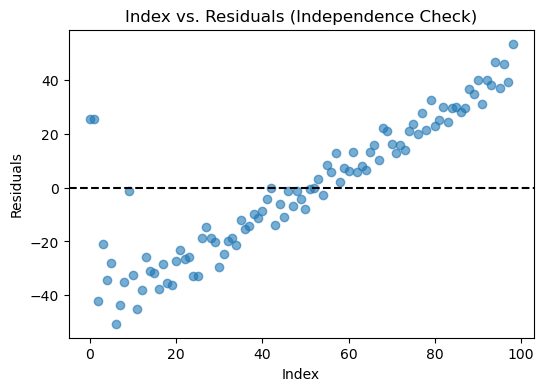

In [15]:
# A plot of the index vs. the residuals
plt.figure(figsize=(6, 4))
plt.scatter(range(len(residuals)), residuals, alpha=0.6)
plt.axhline(0, color='black', linestyle='--')
plt.title("Index vs. Residuals (Independence Check)")
plt.xlabel("Index")
plt.ylabel("Residuals")
plt.show()

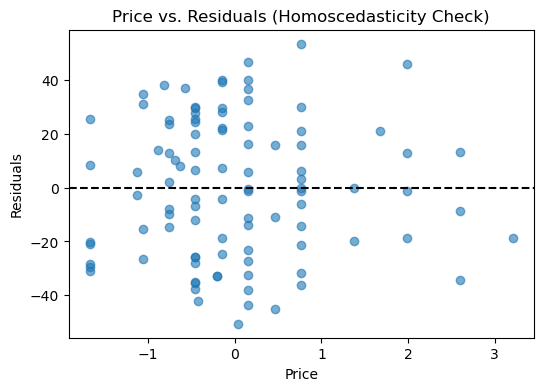

In [16]:
# A plot of Price vs. the residuals
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], residuals, alpha=0.6)
plt.axhline(0, color='black', linestyle='--')
plt.title("Price vs. Residuals (Homoscedasticity Check)")
plt.xlabel("Price")
plt.ylabel("Residuals")
plt.show()

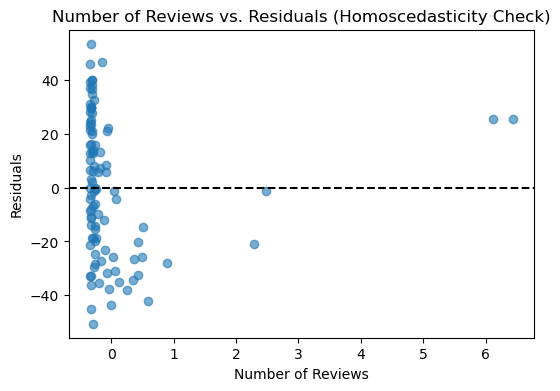

In [17]:
# A plot of Number_of_Reviews vs. the residuals
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 1], residuals, alpha=0.6)
plt.axhline(0, color='black', linestyle='--')
plt.title("Number of Reviews vs. Residuals (Homoscedasticity Check)")
plt.xlabel("Number of Reviews")
plt.ylabel("Residuals")
plt.show()

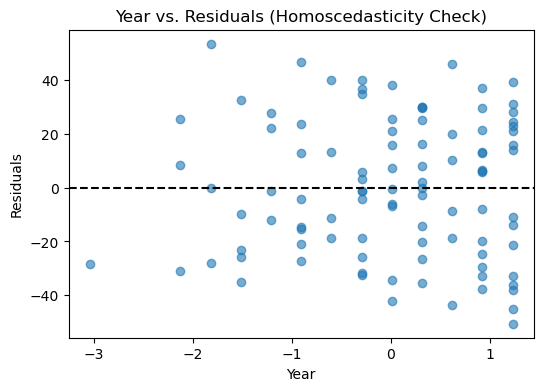

In [18]:
# A plot of Year vs. the residuals
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 2], residuals, alpha=0.6)
plt.axhline(0, color='black', linestyle='--')
plt.title("Year vs. Residuals (Homoscedasticity Check)")
plt.xlabel("Year")
plt.ylabel("Residuals")
plt.show()

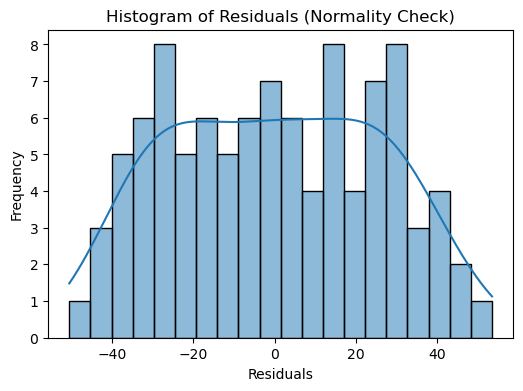

In [19]:
# 5. Histogram of Residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, bins=20)
plt.title("Histogram of Residuals (Normality Check)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

## Data Analysis 

### Assumption
- Before we start looking for relationships and predicting data, we assume that price release time is proportional to ranking, that price and ranking may be slightly inversely proportional, and that the total number of reviews is proportional to ranking.

### Linear Plots Analysis
- Based on the Total Number of Reviews vs Ranking linear plot, we can clearly see that the ranking decreases as the total number of reviews decreases. This shows that there is a positive correlation between ranking and total number of reviews. This is in line with our ideas. However, we also see a number of lower-ranking games with relatively high review totals, suggesting that there are other factors influencing the relationship between ranking and review totals.
- Based on the Price vs Ranking linear plot, we can find that there is no obvious linear relationship between price and ranking. The price of the game fluctuates greatly from rank to rank, showing a random distribution. This means that the correlation between price and ranking is pretty weak. This is not in line with our ideas.
- Based on the Release Year vs Ranking linear plot, we can also see that there is no obvious trend between release year and ranking, and the distribution is as scattered as the relationship between price and ranking. This suggests that the single linear relationship between publication year and ranking is also weak. This is also not in line with our ideas.

### Multiple Regression Analysis
- The Mean Squared Error (MSE) returned by our cross-validation is 727.26. This indicates that the error between our predicted value and the true value is large. The predicted value is not an accurate representation of the true value.
- At the same time, our R squared is about 0.138. This shows that predictions based on Multiple Regression can only explain 13.8% of the variation in the target variable. We believe that this may indicate that the relationship between these variables and ranking is not strong or that Multiple Regression is not suitable for our analysis of variables.
- Through the test of Index vs. Residuals (Independence Check), we can find that the residuals in the figure show obvious trend, which indicates that the residuals may have positive word correlation. This means that the assumption of independence of our model has been compromised. Perhaps we can reduce autocorrelation by adding feature variables, because if we miss the key feature variables, autocorrelation will appear in the residuals.
- Through the homoscedasticity check of Price vs. Residuals, the distribution of residuals in the figure is relatively random, but in some regions, such as larger prices, there are higher residual fluctuations. This means that the residuals may have heteroscedasticity, possibly because the effect of Price on Ranking is not fully captured by the model.
- Through the homoscedasticity check of Number of Reviews vs. Residuals, we found that the residuals showed a dense distribution when Number_of_Reviews approached 0, and the distribution of residuals became sparse with the increase of Number_of_Reviews. We believe that data points with larger Number_of_Reviews have a greater impact on the model, and there may be extreme values or nonlinear relationships.
- Through the homoscedasticity test of Year vs. Residuals, we found that the distribution of residuals in different years was relatively random, and there was no obvious pattern.This means that the effect of Year on Ranking is well captured by the model, and no significant heteroscedasticity problem is observed.
- Through Histogram of Residuals (Normality Check), we can see from the histogram that the residual distribution is slightly bell-shaped, but the data at both ends are also distributed in a large way, which may not be completely determined as normal distribution. Because the numerical distribution of both ends is too large, it will affect the calculation of confidence interval and the robustness of the model. Perhaps we need to remove extreme values from the data in exchange for greater robustness.